In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
%matplotlib inline

In [4]:
train = pd.read_csv('C:/Users/rahul.bhasin/Desktop/Hackathon/Original/train.csv')
test = pd.read_csv('C:/Users/rahul.bhasin/Desktop/Hackathon/Original/test.csv')

In [5]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
train.shape, test.shape

((54808, 14), (23490, 13))

In [7]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [8]:
#Combine into data:
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

(78298, 15)

In [9]:
data.describe()

,KPIs_met >80%,age,avg_training_score,awards_won?,employee_id,is_promoted,length_of_service,no_of_trainings,previous_year_rating
count,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000,78298.000000,78298.000000,72362.000000
mean,0.354032,34.797619,63.349664,0.023053,39149.500000,0.085170,5.848974,1.253378,3.332219
std,0.478222,7.665928,13.383664,0.150073,22602.830026,0.279137,4.248070,0.606766,1.260982
min,0.000000,20.000000,39.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,29.000000,51.000000,0.000000,19575.250000,0.000000,3.000000,1.000000,3.000000
50%,0.000000,33.000000,60.000000,0.000000,39149.500000,0.000000,5.000000,1.000000,3.000000
75%,1.000000,39.000000,76.000000,0.000000,58723.750000,0.000000,7.000000,1.000000,4.000000
max,1.000000,60.000000,99.000000,1.000000,78298.000000,1.000000,37.000000,10.000000,5.000000


In [10]:
#Check missing
data.apply(lambda x: sum(x.isnull()))

KPIs_met >80%               0
age                         0
avg_training_score          0
awards_won?                 0
department                  0
education                3443
employee_id                 0
gender                      0
is_promoted             23490
length_of_service           0
no_of_trainings             0
previous_year_rating     5936
recruitment_channel         0
region                      0
source                      0
dtype: int64

In [11]:
#Add a new column mentioning whether missing or not
data['has_education']=data['education'].apply(lambda x: 0 if pd.isnull(x) else 1)
data['has_previous_year_rating']=data['previous_year_rating'].apply(lambda x: 0 if pd.isnull(x) else 1)
#data['has_previous_year_rating'].value_counts()

In [12]:
#Look at categories of all object variables:
var = ['department','region','education','gender','recruitment_channel']
for v in var:
    print ('\nFrequency count for variable %s'%v)
    print (data[v].value_counts())


Frequency count for variable department
Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64

Frequency count for variable region
region_2     17642
region_22     9167
region_7      6825
region_15     3938
region_13     3815
region_26     3271
region_31     2779
region_4      2478
region_27     2369
region_16     2055
region_28     1913
region_11     1886
region_23     1691
region_29     1408
region_32     1378
region_19     1284
region_14     1177
region_20     1176
region_17     1157
region_25     1156
region_5      1108
region_6       988
region_30      930
region_8       924
region_10      917
region_1       848
region_24      727
region_12      715
region_9       600
region_21      590
region_3       493
region_34      447
region_33      395
region_18       51
Na

In [13]:
#Missing value imputation
data['education'].fillna(data['education'].mode()[0],inplace=True)
data['previous_year_rating'].fillna(data['previous_year_rating'].median(),inplace=True)

In [14]:
#Check missing
data.apply(lambda x: sum(x.isnull()))

KPIs_met >80%                   0
age                             0
avg_training_score              0
awards_won?                     0
department                      0
education                       0
employee_id                     0
gender                          0
is_promoted                 23490
length_of_service               0
no_of_trainings                 0
previous_year_rating            0
recruitment_channel             0
region                          0
source                          0
has_education                   0
has_previous_year_rating        0
dtype: int64

In [16]:
data.head(10)

,KPIs_met >80%,age,avg_training_score,awards_won?,department,education,employee_id,gender,is_promoted,length_of_service,no_of_trainings,previous_year_rating,recruitment_channel,region,source,has_education,has_previous_year_rating
0,1,35,49,0,Sales & Marketing,Master's & above,65438,f,0.0,8,1,5.0,sourcing,region_7,train,1,1
1,0,30,60,0,Operations,Bachelor's,65141,m,0.0,4,1,5.0,other,region_22,train,1,1
2,0,34,50,0,Sales & Marketing,Bachelor's,7513,m,0.0,7,1,3.0,sourcing,region_19,train,1,1
3,0,39,50,0,Sales & Marketing,Bachelor's,2542,m,0.0,10,2,1.0,other,region_23,train,1,1
4,0,45,73,0,Technology,Bachelor's,48945,m,0.0,2,1,3.0,other,region_26,train,1,1
5,0,31,85,0,Analytics,Bachelor's,58896,m,0.0,7,2,3.0,sourcing,region_2,train,1,1
6,0,31,59,0,Operations,Bachelor's,20379,f,0.0,5,1,3.0,other,region_20,train,1,1
7,0,33,63,0,Operations,Master's & above,16290,m,0.0,6,1,3.0,sourcing,region_34,train,1,1
8,0,28,83,0,Analytics,Bachelor's,73202,m,0.0,5,1,4.0,other,region_20,train,1,1
9,1,32,54,0,Sales & Marketing,Master's & above,28911,m,0.0,5,1,5.0,sourcing,region_1,train,1,1


In [17]:
data1=data.copy()

In [218]:
#data1['Total_Score']=data1.apply(lambda x: x['avg_training_score']*x['no_of_trainings'], axis=1)

In [18]:
#Modify datatypes
cols =  ['region']

for col in cols:
    data1[col] = data1[col].astype('category')   

cols2 = ['previous_year_rating']

for col in cols2:
    data1[col] = data1[col].astype('int64')
    
print (data1.dtypes)     

KPIs_met >80%                  int64
age                            int64
avg_training_score             int64
awards_won?                    int64
department                    object
education                     object
employee_id                    int64
gender                        object
is_promoted                  float64
length_of_service              int64
no_of_trainings                int64
previous_year_rating           int64
recruitment_channel           object
region                      category
source                        object
has_education                  int64
has_previous_year_rating       int64
dtype: object


In [19]:
#Numerical Coding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['department','education','gender','recruitment_channel','region']
for col in var_to_encode:
    data1[col] = le.fit_transform(data1[col])

In [20]:
data1 = pd.get_dummies(data1, columns=['department','education','gender','recruitment_channel'])
data1.columns

Index(['KPIs_met >80%', 'age', 'avg_training_score', 'awards_won?',
       'employee_id', 'is_promoted', 'length_of_service', 'no_of_trainings',
       'previous_year_rating', 'region', 'source', 'has_education',
       'has_previous_year_rating', 'department_0', 'department_1',
       'department_2', 'department_3', 'department_4', 'department_5',
       'department_6', 'department_7', 'department_8', 'education_0',
       'education_1', 'education_2', 'gender_0', 'gender_1',
       'recruitment_channel_0', 'recruitment_channel_1',
       'recruitment_channel_2'],
      dtype='object')

In [21]:
data1.head(5)

,KPIs_met >80%,age,avg_training_score,awards_won?,employee_id,is_promoted,length_of_service,no_of_trainings,previous_year_rating,region,...,department_7,department_8,education_0,education_1,education_2,gender_0,gender_1,recruitment_channel_0,recruitment_channel_1,recruitment_channel_2
0,1,35,49,0,65438,0.0,8,1,5,31,...,1,0,0,0,1,1,0,0,0,1
1,0,30,60,0,65141,0.0,4,1,5,14,...,0,0,1,0,0,0,1,1,0,0
2,0,34,50,0,7513,0.0,7,1,3,10,...,1,0,1,0,0,0,1,0,0,1
3,0,39,50,0,2542,0.0,10,2,1,15,...,1,0,1,0,0,0,1,1,0,0
4,0,45,73,0,48945,0.0,2,1,3,18,...,0,1,1,0,0,0,1,1,0,0


In [22]:
#Split back in train and test

#data1.drop(['employee_id'], axis=1,inplace =True)
train1 = data1.loc[data1['source']=='train']
test1 = data1.loc[data1['source']=='test']

In [23]:
train1.drop('source',axis=1,inplace=True)
test1.drop(['source','is_promoted'],axis=1,inplace=True)

C:\Users\rahul.bhasin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rahul.bhasin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
test1 = test1.reset_index(drop=True)
test1.head()

,KPIs_met >80%,age,avg_training_score,awards_won?,employee_id,length_of_service,no_of_trainings,previous_year_rating,region,has_education,...,department_7,department_8,education_0,education_1,education_2,gender_0,gender_1,recruitment_channel_0,recruitment_channel_1,recruitment_channel_2
0,1,24,77,0,8724,1,1,3,18,1,...,0,1,1,0,0,0,1,0,0,1
1,0,31,51,0,74430,5,1,3,28,1,...,0,0,1,0,0,1,0,1,0,0
2,0,31,47,0,72255,4,1,1,4,1,...,1,0,1,0,0,0,1,1,0,0
3,0,31,65,0,38562,9,3,2,11,1,...,0,0,1,0,0,1,0,1,0,0
4,0,30,61,0,64486,7,1,4,21,1,...,0,0,1,0,0,0,1,0,0,1


In [25]:
cols2 = ['is_promoted']

for col in cols2:
    train1[col] = train1[col].astype('int64')
    
print (train1.dtypes)  

KPIs_met >80%               int64
age                         int64
avg_training_score          int64
awards_won?                 int64
employee_id                 int64
is_promoted                 int64
length_of_service           int64
no_of_trainings             int64
previous_year_rating        int64
region                      int64
has_education               int64
has_previous_year_rating    int64
department_0                uint8
department_1                uint8
department_2                uint8
department_3                uint8
department_4                uint8
department_5                uint8
department_6                uint8
department_7                uint8
department_8                uint8
education_0                 uint8
education_1                 uint8
education_2                 uint8
gender_0                    uint8
gender_1                    uint8
recruitment_channel_0       uint8
recruitment_channel_1       uint8
recruitment_channel_2       uint8
dtype: object


C:\Users\rahul.bhasin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
#from scipy.stats import chi2_contingency
#csq=chi2_contingency(pd.crosstab(train1['is_promoted'], train1['region']))
#print("P-value: ",csq[1])

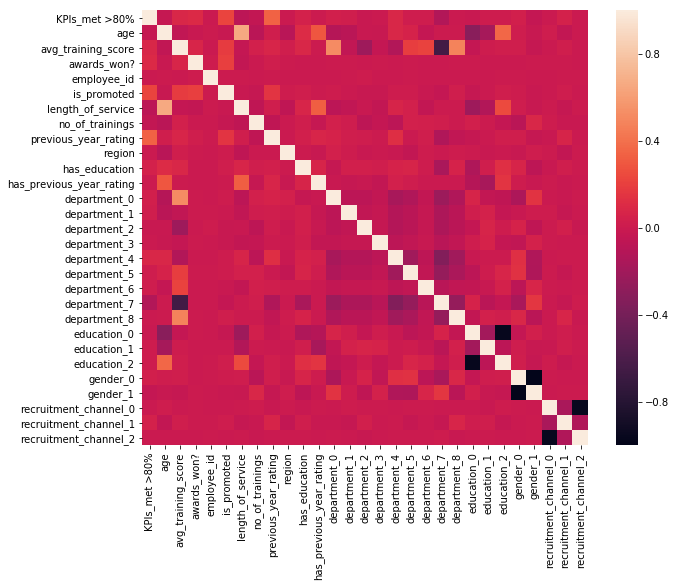

In [26]:
#Correlation Plot
plt.figure(figsize = (10,8))
sns.heatmap(train1.corr())

In [28]:
target = train1['is_promoted'] # Labels
feature_names =[x for x in train1.columns if x not in ['is_promoted','employee_id']] # Features

In [29]:
#Test Train Split
x_train, x_val, y_train, y_val = train_test_split(train1[feature_names], target,test_size = 0.3,random_state =100)

In [ ]:
#sc_X = StandardScaler()
#x_train = sc_X.fit_transform(x_train)
#x_val = sc_X.transform(x_val)

In [ ]:
#Approach A: Parameter tuning for RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state=100)

In [31]:
param_grid = { 
    'n_estimators': [95],
    'max_features': ['auto'],
    'max_depth' : [27],
    'criterion' :['entropy'],
    'n_jobs' :[-1],
    'min_samples_leaf' :[2]
}

In [32]:
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [95], 'max_features': ['auto'], 'max_depth': [27], 'criterion': ['entropy'], 'n_jobs': [-1], 'min_samples_leaf': [2]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [33]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 27,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 95,
 'n_jobs': -1}

In [34]:
rfc1=RandomForestClassifier(random_state=100, max_features='auto', n_estimators= 95, max_depth=27, criterion='entropy')
rfc1.fit(x_train, y_train)
pred=rfc1.predict(x_val)

In [35]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_val,pred))

Accuracy for Random Forest on CV data:  0.938271604938


In [38]:
feature_imp = pd.Series(rfc1.feature_importances_,index=['KPIs_met >80%', 'age', 'avg_training_score', 'awards_won?',
       'length_of_service', 'no_of_trainings', 'previous_year_rating','region', 'has_education',
        'has_previous_year_rating', 'department_0','department_1', 'department_2', 'department_3', 'department_4',
       'department_5', 'department_6', 'department_7', 'department_8','education_0', 'education_1', 'education_2',
       'gender_0', 'gender_1','recruitment_channel_0', 'recruitment_channel_1','recruitment_channel_2']).sort_values(ascending=False)
feature_imp

avg_training_score          0.280839
age                         0.121594
region                      0.104831
length_of_service           0.092092
KPIs_met >80%               0.090059
previous_year_rating        0.066976
department_7                0.031632
awards_won?                 0.031609
no_of_trainings             0.024275
department_4                0.020700
recruitment_channel_2       0.013998
recruitment_channel_0       0.013518
department_5                0.012001
gender_0                    0.011691
gender_1                    0.011423
department_0                0.011071
department_8                0.008904
education_2                 0.008095
education_0                 0.008080
department_1                0.007436
department_6                0.005776
department_2                0.005363
recruitment_channel_1       0.004639
has_previous_year_rating    0.004579
has_education               0.004445
department_3                0.002932
education_1                 0.001441
d

In [39]:
y_predicted=rfc1.predict(test1[feature_names])
y_predicted = pd.DataFrame(y_predicted)
y_predicted.columns = ["is_promoted"]
y_predicted.sum()
output=pd.concat([test1['employee_id'],y_predicted], axis=1)
output[['employee_id','is_promoted']].to_csv('C:/Users/rahul.bhasin/Desktop/Hackathon/Outputs/output_1.csv',index=False)
#output.head()

In [ ]:
#Approach B: Parameter tuning for GradientBoostingClassifier

In [311]:
def modelfit(alg, dtrain, dtest, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['is_promoted'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['is_promoted'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['is_promoted'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['is_promoted'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
                
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9402
AUC Score (Train): 0.911486
CV Score : Mean - 0.90459 | Std - 0.002643499 | Min - 0.9018625 | Max - 0.9087255


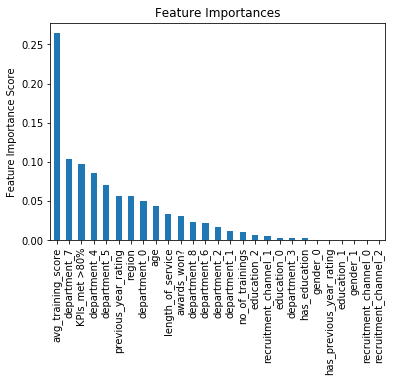

In [198]:
#Choose all predictors except target & IDcols
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train1, test1, feature_names)

In [312]:
y_predicted=gbm0.predict(test1[feature_names])
y_predicted = pd.DataFrame(y_predicted)
y_predicted.columns = ["is_promoted"]
y_predicted.sum()
output=pd.concat([test1['employee_id'],y_predicted], axis=1)
output[['employee_id','is_promoted']].to_csv('C:/Users/rahul.bhasin/Desktop/Hackathon/Outputs/output_1.csv',index=False)
#output.head()

In [40]:
predictors=feature_names
param_test1 = {'n_estimators':np.arange(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,
                                    min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                                    param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train1[predictors],train1[target])

In [272]:
#Approach B: Parameter tuning for xgboost

In [243]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [313]:
def modelfit(alg, dtrain, dtest, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['is_promoted'].values)
        xgtest = xgb.DMatrix(dtest[predictors].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['is_promoted'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['is_promoted'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['is_promoted'], dtrain_predprob))
    
#     Predict on testing data:
    dtest['predprob'] = alg.predict_proba(dtest[predictors])[:,1]
#    results = test_results.merge(dtest[['employee_id','predprob']], on='employee_id')
    results = pd.concat([test_results['is_promoted'],dtest['predprob']], axis=1)
    print ('AUC Score (Test): %f' % metrics.roc_auc_score(results['is_promoted'], results['predprob']))
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9438
AUC Score (Train): 0.933837
AUC Score (Test): 0.909775


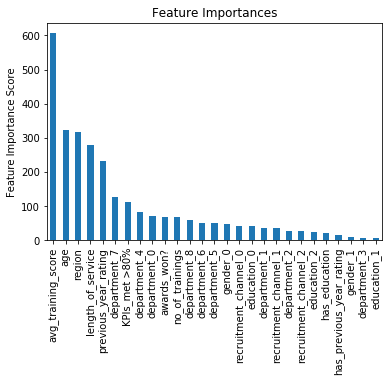

In [370]:
predictors=feature_names
xgb1 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=100)

test_results=pd.concat([x_val,y_val], axis=1)
train_results=pd.concat([x_train,y_train], axis=1)

modelfit(xgb1, train_results, test_results, predictors)

In [278]:
test_results.columns

Index(['KPIs_met >80%', 'age', 'avg_training_score', 'awards_won?',
       'length_of_service', 'no_of_trainings', 'previous_year_rating',
       'region', 'has_education', 'has_previous_year_rating', 'Total_Score',
       'department_0', 'department_1', 'department_2', 'department_3',
       'department_4', 'department_5', 'department_6', 'department_7',
       'department_8', 'education_0', 'education_1', 'education_2', 'gender_0',
       'gender_1', 'recruitment_channel_0', 'recruitment_channel_1',
       'recruitment_channel_2', 'is_promoted', 'predprob'],
      dtype='object')

In [376]:
xg1=XGBClassifier(
        learning_rate =0.1,
        n_estimators=1075,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=100)
xg1.fit(train1[feature_names], train1['is_promoted'])
y_predicted=xg1.predict(test1[feature_names])
y_predicted = pd.DataFrame(y_predicted)
y_predicted.columns = ["is_promoted"]
y_predicted.sum()
output=pd.concat([test1['employee_id'],y_predicted], axis=1)
output[['employee_id','is_promoted']].to_csv('C:/Users/rahul.bhasin/Desktop/Hackathon/Outputs/output_1.csv',index=False)
#output.head()

In [326]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test1 = {'max_depth':np.arange(3,10,2),
               'min_child_weight':np.arange(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train1[feature_names], train1['is_promoted'])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': array([3, 5, 7, 9]), 'min_child_weight': array([1, 3, 5])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [327]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.90604, std: 0.00267, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.90578, std: 0.00286, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.90519, std: 0.00286, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.91101, std: 0.00249, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.91053, std: 0.00288, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.91019, std: 0.00321, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.90974, std: 0.00275, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.90938, std: 0.00310, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.90901, std: 0.00371, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.90713, std: 0.00320, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.90748, std: 0.00338, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.90841, std: 0.00332, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_child_weight': 1

In [328]:
#Grid seach on subsample and max_features
param_test2 = {
    'max_depth':[4,5,6],
    'min_child_weight':[1,2]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
                                        min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train1[feature_names], train1['is_promoted'])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=2, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [4, 5, 6], 'min_child_weight': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [332]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.91003, std: 0.00282, params: {'max_depth': 4, 'min_child_weight': 1},
  mean: 0.91000, std: 0.00306, params: {'max_depth': 4, 'min_child_weight': 2},
  mean: 0.91101, std: 0.00249, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.91050, std: 0.00278, params: {'max_depth': 5, 'min_child_weight': 2},
  mean: 0.91025, std: 0.00239, params: {'max_depth': 6, 'min_child_weight': 1},
  mean: 0.91015, std: 0.00266, params: {'max_depth': 6, 'min_child_weight': 2}],
 {'max_depth': 5, 'min_child_weight': 1},
 0.911013644674618)

In [330]:
#Grid seach on gamma
param_test3 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train1[feature_names], train1['is_promoted'])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [333]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.91101, std: 0.00249, params: {'gamma': 0.0},
  mean: 0.91080, std: 0.00228, params: {'gamma': 0.1},
  mean: 0.91074, std: 0.00264, params: {'gamma': 0.2},
  mean: 0.91102, std: 0.00247, params: {'gamma': 0.3},
  mean: 0.91064, std: 0.00234, params: {'gamma': 0.4}],
 {'gamma': 0.3},
 0.9110176932430127)


Model Report
Accuracy : 0.9455
AUC Score (Train): 0.946765
AUC Score (Test): 0.909751


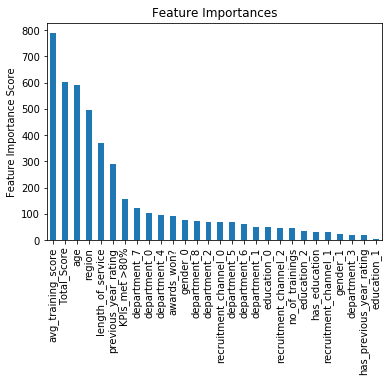

In [335]:
xgb2 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1,
        gamma=0.3,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=100)

modelfit(xgb2, train_results, test_results, predictors)

In [336]:
#Grid seach on subsample and colsample_bytree 
param_test4 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                        min_child_weight=1, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train1[feature_names], train1['is_promoted'])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.3, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=140, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [337]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.90963, std: 0.00233, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.91009, std: 0.00291, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.91068, std: 0.00276, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.91155, std: 0.00267, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.91003, std: 0.00278, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.91098, std: 0.00247, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.91133, std: 0.00226, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.91093, std: 0.00332, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.91000, std: 0.00279, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.91050, std: 0.00246, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.91102, std: 0.00247, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.91055, std: 0.00297, params: {'colsample_bytree': 0.8, 'subsample'

In [340]:
#Grid seach on subsample and colsample_bytree
param_test5 = {
    'subsample':[i/100.0 for i in range(85,95,5)],
    'colsample_bytree':[i/100.0 for i in range(55,65,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                        min_child_weight=1, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train1[feature_names], train1['is_promoted'])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.3, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=140, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.85, 0.9], 'colsample_bytree': [0.55, 0.6]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [341]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.91059, std: 0.00255, params: {'colsample_bytree': 0.55, 'subsample': 0.85},
  mean: 0.91038, std: 0.00298, params: {'colsample_bytree': 0.55, 'subsample': 0.9},
  mean: 0.91060, std: 0.00292, params: {'colsample_bytree': 0.6, 'subsample': 0.85},
  mean: 0.91155, std: 0.00267, params: {'colsample_bytree': 0.6, 'subsample': 0.9}],
 {'colsample_bytree': 0.6, 'subsample': 0.9},
 0.9115536696556064)

In [344]:
param_test6 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                        min_child_weight=1, gamma=0.3, subsample=0.9, colsample_bytree=0.6,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train1[feature_names], train1['is_promoted'])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.3, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=140, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.9),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [345]:
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.91155, std: 0.00267, params: {'reg_alpha': 1e-05},
  mean: 0.91066, std: 0.00309, params: {'reg_alpha': 0.01},
  mean: 0.91101, std: 0.00258, params: {'reg_alpha': 0.1},
  mean: 0.91143, std: 0.00303, params: {'reg_alpha': 1},
  mean: 0.88466, std: 0.00385, params: {'reg_alpha': 100}],
 {'reg_alpha': 1e-05},
 0.9115536376024899)

In [355]:
param_test7 = {
    'n_estimators':[193,195,196,198,200,202,204,206]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,reg_alpha=1e-08,
                                        min_child_weight=1, gamma=0.3, subsample=0.9, colsample_bytree=0.6,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(train1[feature_names], train1['is_promoted'])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.3, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=140, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=1e-08, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.9),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [193, 195, 196, 198, 200, 202, 204, 206]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [356]:
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

([mean: 0.91214, std: 0.00261, params: {'n_estimators': 193},
  mean: 0.91211, std: 0.00271, params: {'n_estimators': 195},
  mean: 0.91207, std: 0.00265, params: {'n_estimators': 196},
  mean: 0.91206, std: 0.00267, params: {'n_estimators': 198},
  mean: 0.91211, std: 0.00270, params: {'n_estimators': 200},
  mean: 0.91209, std: 0.00275, params: {'n_estimators': 202},
  mean: 0.91203, std: 0.00278, params: {'n_estimators': 204},
  mean: 0.91199, std: 0.00282, params: {'n_estimators': 206}],
 {'n_estimators': 193},
 0.9121376693154447)

In [359]:
param_test8 = {
    'learning_rate':[0.1,0.5,0.01,0.05,0.001]
}
gsearch8 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=193, max_depth=5,reg_alpha=1e-08,
                                        min_child_weight=1, gamma=0.3, subsample=0.9, colsample_bytree=0.6,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test8, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch8.fit(train1[feature_names], train1['is_promoted'])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.3, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=193, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=1e-08, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.9),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'learning_rate': [0.1, 0.5, 0.01, 0.05, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [360]:
gsearch8.grid_scores_, gsearch8.best_params_, gsearch8.best_score_

([mean: 0.91214, std: 0.00261, params: {'learning_rate': 0.1},
  mean: 0.90025, std: 0.00386, params: {'learning_rate': 0.5},
  mean: 0.88346, std: 0.00271, params: {'learning_rate': 0.01},
  mean: 0.91019, std: 0.00364, params: {'learning_rate': 0.05},
  mean: 0.86973, std: 0.00300, params: {'learning_rate': 0.001}],
 {'learning_rate': 0.1},
 0.9121376693154447)


Model Report
Accuracy : 0.9448
AUC Score (Train): 0.944302
AUC Score (Test): 0.909759


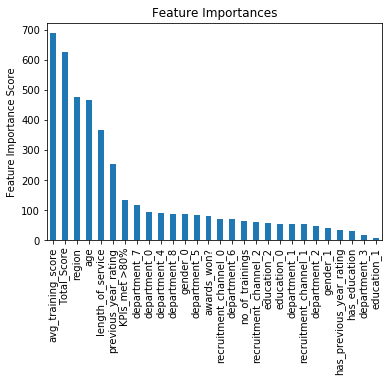

In [358]:
xgb3 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=193,
        max_depth=5,
        min_child_weight=1,
        gamma=0.3,
        subsample=0.9,
        colsample_bytree=0.6,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        reg_alpha=1e-08,
        seed=100)
modelfit(xgb3, train_results, test_results, predictors)

In [369]:
xgb3 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1,
        gamma=0.3,
        subsample=0.9,
        colsample_bytree=0.6,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        reg_alpha=1e-08,
        seed=27)
xgb3.fit(train1[feature_names], train1['is_promoted'])
y_predicted=xgb3.predict(test1[feature_names])
y_predicted = pd.DataFrame(y_predicted)
y_predicted.columns = ["is_promoted"]
y_predicted.sum()
output=pd.concat([test1['employee_id'],y_predicted], axis=1)
output[['employee_id','is_promoted']].to_csv('C:/Users/rahul.bhasin/Desktop/Hackathon/Outputs/output_1.csv',index=False)